# 2.- Optimizers

In this tutotial, we will see how to use Optimizers module inside Nauyaca.
Optimizers are helpful to quickly explore the parameter space and search approximate solutions to the fitting through minimizing a $\chi^2$ statistic.

Optimizers module join a chain of methods namely, Differential Evolution, Powell and Nelder-Mead minimization methods to track solutions that best reproduce the TTVs.

In [55]:
import nauyaca as nau

Along this tutorial we'll also make some plots to visualize the results and to understand what the optimizers are doing. Thus, let's import the library matplotlib

In [56]:
import matplotlib.pyplot as plt

%matplotlib inline

## 2.1 Loading the Planetary System

In the Introduction tutorial we create a Planetary System object that was saved in **pickle** and **json** formats. These files contain all the information about the planetary system. As described there, both formats have pros and cons. Hence, saving both formats is strongly recomended.


Let's see how these formats can be loaded to rebuilt the Planetary System saved before. To do that, we call again the PlanetarySystem module inside nauyaca, and load the respective files as follows:

**Loading from pickle:**

In [57]:
PS = nau.PlanetarySystem.load_pickle('SystemX.pkl')

print(PS) # print to see the saved object


 =========== Planetary System Summary =========== 
--> Parameter -ecc- of planet -Planet-b- set to lower physical limit: 1e-06
--> Parameter -ecc- of planet -Planet-c- set to lower physical limit: 1e-06

System: SystemX
Mstar: 0.9132 Msun |  Rstar: 0.8632 Rsun
Number of planets: 2
Planet information:
------
Planet: Planet-b
  Boundaries:
    mass: (1, 20.0)  [M_earth]
    period: (5.35, 5.36)  [d]
    ecc: (1e-06, 0.2)   
    inclination: (85, 95)  [deg]
    argument: (0.0, 360)  [deg]
    mean_anomaly: (0.0, 360)  [deg]
    ascending_node: (88.36, 88.36)  [deg]
  TTVs: True
------
Planet: Planet-c
  Boundaries:
    mass: (1, 100)  [M_earth]
    period: (11.83, 11.84)  [d]
    ecc: (1e-06, 0.2)   
    inclination: (85, 95)  [deg]
    argument: (0.0, 360)  [deg]
    mean_anomaly: (0.0, 360)  [deg]
    ascending_node: (0.0, 180.0)  [deg]
  TTVs: True

Simulation attributes: 
Reference epoch of the solutions (T0JD): 0.0 [JD]
Total time of TTVs data (Ftime): 200 [days]
Timestep of the sim

**Loading from json:**

In [58]:
PS = nau.PlanetarySystem.load_json('SystemX.json')

print(PS) # print to see the saved object

--> Parameter -ecc- of planet -Planet-b- set to lower physical limit: 1e-06
--> Parameter -ecc- of planet -Planet-c- set to lower physical limit: 1e-06

 =========== Planetary System Summary =========== 
--> Parameter -ecc- of planet -Planet-b- set to lower physical limit: 1e-06
--> Parameter -ecc- of planet -Planet-c- set to lower physical limit: 1e-06

System: SystemX
Mstar: 0.9132 Msun |  Rstar: 0.8632 Rsun
Number of planets: 2
Planet information:
------
Planet: Planet-b
  Boundaries:
    mass: (1, 20.0)  [M_earth]
    period: (5.35, 5.36)  [d]
    ecc: (1e-06, 0.2)   
    inclination: (85, 95)  [deg]
    argument: (0.0, 360)  [deg]
    mean_anomaly: (0.0, 360)  [deg]
    ascending_node: (88.36, 88.36)  [deg]
  TTVs: True
------
Planet: Planet-c
  Boundaries:
    mass: (1, 100)  [M_earth]
    period: (11.83, 11.84)  [d]
    ecc: (1e-06, 0.2)   
    inclination: (85, 95)  [deg]
    argument: (0.0, 360)  [deg]
    mean_anomaly: (0.0, 360)  [deg]
    ascending_node: (0.0, 180.0)  [deg]

In both cases the Planetary system is rebuild with the previous saved parameters. 


## 2.2 Running the optimizers

Now is time to run the optimizers. Let's initialize the simulation by passing the Planetary System  object we want to analize, the number of solutions to reach and the number of cores to run in parallel

In [59]:
# Instantiating Optimizers
optim = nau.Optimizers(PS, nsols=24, cores=8)

To run it, jus call .run method. It will take a few minutes to complete

In [60]:
# Running Optimizers
opt_solutions = optim.run()


 =========== OPTIMIZATION ===========

--> Starting date:  2021-02-01 05:48
--> Finding 24 solutions using 8 cores
--> Results will be saved at:
     * ./SystemX_cube.opt (normalized)
     * ./SystemX_phys.opt (physical)
--> Reference time of the solutions: 0.0 [days]
- - - - - - - - - - - - - - - - - - - - -
Solution  |   chi square from optimizers
- - - - - - - - - - - - - - - - - - - - -
 8 | DE: 21660659.903  PW: 15257.365  NM: 3717.747
 5 | DE: 6775593.513  PW: 309704.217  NM: 3772.836
 2 | DE: 8885501.869  PW: 8269.536  NM: 1834.347
 4 | DE: 20385958.047  PW: 2980935.001  NM: 9600.247
 1 | DE: 13670097.554  PW: 184906.857  NM: 84402.456
 7 | DE: 6657413.002  PW: 15976.882  NM: 3607.123
 3 | DE: 11861415.950  PW: 13854.205  NM: 3644.949
 6 | DE: 31846701.460  PW: 294167.002  NM: 186029.689
 10 | DE: 24888780.608  PW: 53274.826  NM: 3672.247
 9 | DE: 36262157.593  PW: 4825.878  NM: 3856.986
 13 | DE: 39924527.688  PW: 1644079.170  NM: 1643992.444
 15 | DE: 82003627.998  PW: 672859

The output provides a general outlook of the $\chi^2$ minimization: for each solution, the sequence show the $\chi^2$ of the best solution found for the algorithms Differential Evolution (DE), Powell (PW), and Nelder-Mead (NM). Nauyaca takes the last result (NM) as the final solution of each run.

At this point, results have been saved in two files with extension **.opt**, with the following suffixes:

* **_cube.opt:** The results from  optimizers are normalized between 0 and 1. This file will be useful for the MCMC (next tutorial).

* **_phys.opt:** The results from optimizers are saved in physical values. This can be used by users to visualize the physical results.

These are saved in the current directory, starting with the Planetary System name, you can take a look! Each row in these files are the solutions, being the first element the $\chi^2$ and the rest are the planetary parameters of the first planet concatenated with planetary parameters of the next planet(s). A flag in column chi2 of 1e+50 could rise if the minimizers could not find a solution.

## 2.3 Accessing to results

### 2.3.1 Results as arrays

Even though the results have been saved, we can access to these solutions trough the variable assigned to the optimizers run:

In [61]:
opt_solutions

{'chi2': array([1.83434742e+03, 2.87366721e+03, 3.04938511e+03, 3.25543477e+03,
        3.60712328e+03, 3.64494934e+03, 3.67224676e+03, 3.71774735e+03,
        3.77283638e+03, 3.85698573e+03, 3.90914626e+03, 4.37456204e+03,
        4.60189699e+03, 4.76868257e+03, 6.67965364e+03, 6.89099642e+03,
        9.60024689e+03, 3.42336575e+04, 8.44024559e+04, 1.86029689e+05,
        4.60656188e+05, 7.33589278e+05, 1.64399244e+06, 5.58982197e+06]),
 'cube': array([[6.73233919e-01, 4.77023884e-01, 7.97077682e-01, 8.41550137e-01,
         9.44969728e-01, 2.97909263e-01, 1.89368549e-01, 4.14177632e-01,
         9.22765337e-01, 3.01925128e-01, 3.62344810e-01, 9.18095237e-01,
         7.51581042e-01],
        [4.80223134e-10, 5.36048624e-01, 8.24348090e-01, 1.42599662e-01,
         9.19804341e-01, 4.90696912e-01, 2.55195038e-01, 1.36635804e-01,
         3.81192392e-01, 2.72452360e-01, 3.80269042e-01, 6.85005306e-01,
         2.67897830e-11],
        [1.86288164e-01, 4.70507693e-01, 9.99999957e-01, 1.4

or, through the .results method of Optimizers

In [62]:
optim.results

{'chi2': array([1.83434742e+03, 2.87366721e+03, 3.04938511e+03, 3.25543477e+03,
        3.60712328e+03, 3.64494934e+03, 3.67224676e+03, 3.71774735e+03,
        3.77283638e+03, 3.85698573e+03, 3.90914626e+03, 4.37456204e+03,
        4.60189699e+03, 4.76868257e+03, 6.67965364e+03, 6.89099642e+03,
        9.60024689e+03, 3.42336575e+04, 8.44024559e+04, 1.86029689e+05,
        4.60656188e+05, 7.33589278e+05, 1.64399244e+06, 5.58982197e+06]),
 'cube': array([[6.73233919e-01, 4.77023884e-01, 7.97077682e-01, 8.41550137e-01,
         9.44969728e-01, 2.97909263e-01, 1.89368549e-01, 4.14177632e-01,
         9.22765337e-01, 3.01925128e-01, 3.62344810e-01, 9.18095237e-01,
         7.51581042e-01],
        [4.80223134e-10, 5.36048624e-01, 8.24348090e-01, 1.42599662e-01,
         9.19804341e-01, 4.90696912e-01, 2.55195038e-01, 1.36635804e-01,
         3.81192392e-01, 2.72452360e-01, 3.80269042e-01, 6.85005306e-01,
         2.67897830e-11],
        [1.86288164e-01, 4.70507693e-01, 9.99999957e-01, 1.4

In both cases it will return a dictionary containing arrays for the $\chi^2$ and the corresponding solutions in both ways: normalized ('cube') and physical values ('physical'). Here, the $\chi^2$ is ordered from lower to greater value (best to worse solution), but also the solutions (cube or physical) are ordered accordingly. 

What can we do with this information?

Let's for example, find **the best solution**. Since the .results method return the results ordered by $\chi^2$, let's take the first element (index 0) of 'chi2' and 'physical':

In [63]:
best_chi2 = optim.results['chi2'][0]
best_sol  = optim.results['physical'][0]

print("Best solution found by optimizers: \n")
print(f"Best chi2:\n    {best_chi2}")
print(f"Best solution:\n {best_sol}")

Best solution found by optimizers: 

Best chi2:
    1834.3474200853614
Best solution:
 [1.37914445e+01 5.35477024e+00 1.59415739e-01 9.34155014e+01
 2.67436437e+02 5.29417674e+01 1.97474863e+01 1.18341418e+01
 1.84553145e-01 8.80192513e+01 2.80958417e+02 3.39929846e+02
 1.35284587e+02]


Okay, but what these numbers mean? Elements of the arrays are the planet parameters in the order saved in .params_names:

In [64]:
# Parameters names
PS.params_names

'mass1  period1  ecc1  inclination1  argument1  mean_anomaly1  mass2  period2  ecc2  inclination2  argument2  mean_anomaly2  ascending_node2'

Note that elements in .params_names contains numbers at the end (1, 2,..), which refer to **the entry order of the planets in the system**. That is why the ordering is important when creating the Planetary System! Anyway, if you do not remember the order, we can find it out:

In [65]:
for planet, index in PS.planets_IDs.items():
    print(f"{planet}: {index+1}")

Planet-b: 1
Planet-c: 2


### 2.3.2 Results as dictionary

There's another useful way of getting the results, where all the solutions are grouped by planet parameters. Let's access through:

In [66]:
results_grouped = optim.results_dict
results_grouped

{'mass1': array([13.79144446,  1.00000001,  4.53947512, 19.9997371 , 19.99971069,
        19.67423875,  1.00033362,  1.0000182 ,  1.        ,  1.00000008,
        19.9999762 , 17.75650715, 19.81942371, 19.99999995,  1.        ,
        19.99999707,  1.        ,  1.        ,  1.        , 13.31700147,
         8.79749812, 20.        ,  8.5326335 ,  1.00000001]),
 'period1': array([5.35477024, 5.35536049, 5.35470508, 5.35475692, 5.3551601 ,
        5.3554442 , 5.35525652, 5.35524074, 5.35524797, 5.35523509,
        5.35589151, 5.35342953, 5.35525951, 5.35333681, 5.35525831,
        5.35573459, 5.35525035, 5.35999997, 5.35383294, 5.35047894,
        5.35547661, 5.35133066, 5.35143137, 5.35062983]),
 'ecc1': array([1.59415739e-01, 1.64869794e-01, 1.99999991e-01, 1.08669869e-01,
        5.28747140e-02, 1.54271244e-01, 1.85291845e-01, 2.23732109e-02,
        6.36886473e-02, 1.21956409e-01, 1.58324143e-01, 1.45660642e-02,
        1.12502082e-01, 1.36702647e-01, 4.97489529e-06, 1.36286665e-01,


Now, all the solutions of independet parameters are available! Note that there's also a 'chi2' field, that collects the $\chi^2$ of the individual parameter solutions. 

## 2.4 Visualizing the results

Let's use the information from optimizers to make interesting plots. But first, let's import numpy to manage arrays

In [67]:
import numpy as np

### Plotting distributions

Let's visualize the results of individual parameters by plotting histograms

Text(0.5, 0, 'ascending_node2')

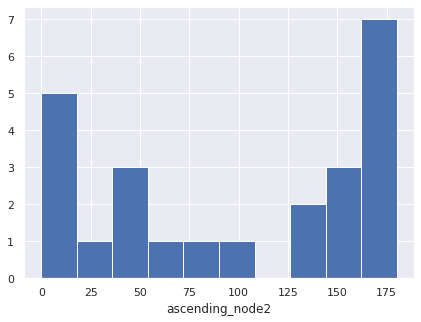

In [68]:
plt.figure(figsize=(7,5))

param = 'ascending_node2'

plt.hist(results_grouped[param]);
plt.xlabel(param)

### Plotting parameter pairs

Let's plot the parameter space of two parameters with the aim of visualize the regions where the optimizers found solutions. The colors will correspond to $\log_{10}(\chi^2)$.  Low values of $\chi^2$ correspond to better solutions in the minimization process so they are preferred.
Using the color map 'inferno_r', the yellow colors correspond to the best solutions and black to the worse. Also remember that the valid parameter names are:

In [70]:
PS.params_names

'mass1  period1  ecc1  inclination1  argument1  mean_anomaly1  mass2  period2  ecc2  inclination2  argument2  mean_anomaly2  ascending_node2'

Let's plot the best solution as a cyan star

Text(0, 0.5, 'mass2')

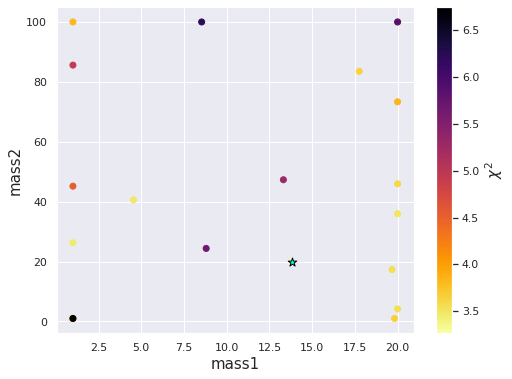

In [71]:
plt.figure(figsize=(8,6))

# Try changing these parameters
x = 'mass1'
y = 'mass2'

plt.scatter(results_grouped[x], results_grouped[y], 
            c=np.log10(results_grouped['chi2']), cmap='inferno_r')
plt.colorbar().set_label(r"$\chi^2$",fontsize=15)

# 
plt.scatter(results_grouped[x][0], results_grouped[y][0], 
            color='cyan', marker='*', s=80, edgecolors='black')

plt.xlabel(x,fontsize=15)
plt.ylabel(y,fontsize=15)

### Plotting the TTVs

Let's plot many solutions from the optimizer and compare them with the observed TTVs. To do so, Nauyaca contains a built-in function to visualize TTVs through the Plots module. 

Provide the Planetary System object to initialize the module:

In [72]:
nauplot = nau.Plots_c(PS)

Now, use the plot_TTVs function to pass a list of the solution(s) to plot ($without$ the information of $\chi^2$). Let's plot, for example, the best 3 solutions found by the optimizers:

3
3
3


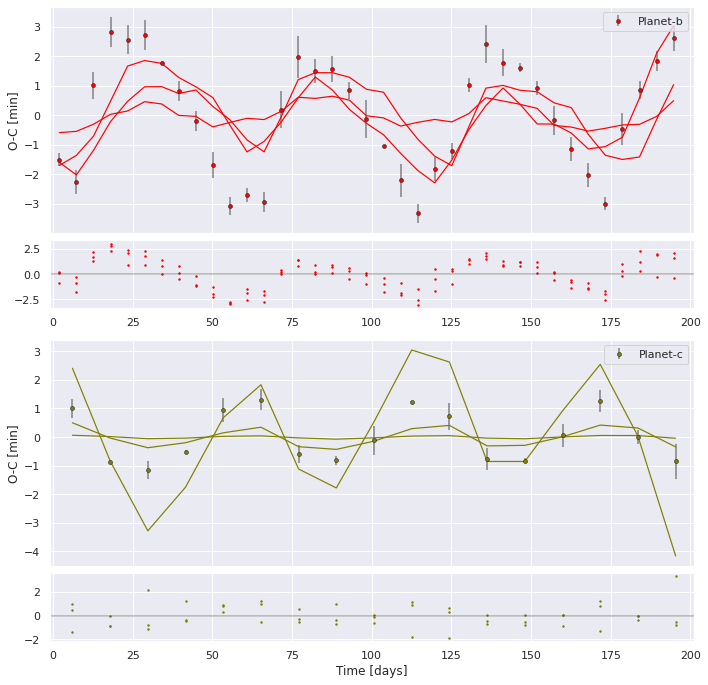

In [76]:
nauplot.plot_TTVs(flat_params=opt_solutions['physical'][:3])

plt.savefig("TTVs_optimizer.png") # Save

Ok, that does not looks like an ideal TTVs fit. Results from the optimizers provide a fast way of gettinf approximate solutions. They also allow us to have an overall outlook of the solutions in the parameter space. To increase the chance of getting better solutions, just increase the number of solutions 'nsols' in nau.Optimizers(). 

**Though, the results from optimizers carry valuable information that can be used in the MCMC. We'll see how to use this information to start the MCMC in the next tutorial. See you there!**

____________________________________

## 2.2 Visualizing the results

Let's plot the best n solutions from the optimizer and compare them with the observed TTVs. To do that, we import a useful function in the nauyaca package: plot_TTVs.

Pass the Planetary Object and a list of lists with the solutions you want to plot

[[5.884178657665177, 33.617999849845965, 0.15367736654793546, 88.91319362170186, 343.7188897405271, 218.09465710071828, 180.0, 12.584984905475737, 73.50799999987241, 0.11897076691713386, 88.94988880515771, 66.07853921294151, 20.071554423944722, 184.65378093714122]]


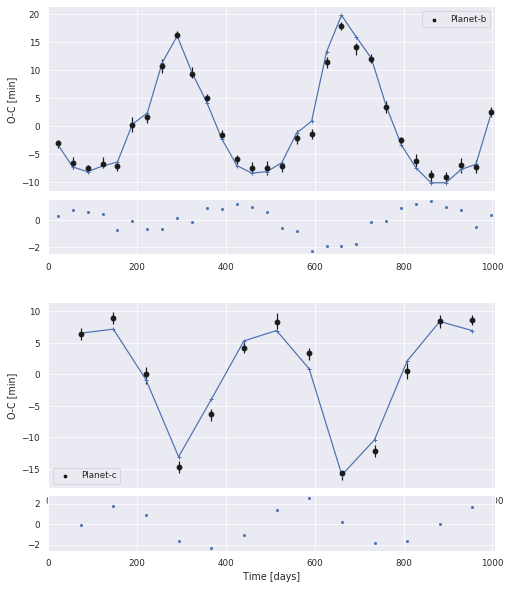

In [18]:
from nauyaca_local.plots import plot_TTVs

# Extract the best n solutions

n_sols = 1  # change here the number of best solutions from the optimizers!

best_n_solutions = [s[1:] for s in sort_res[:n_sols]]
print(best_n_solutions)
# Plot the observed TTVs and the 3 solutions
plot_TTVs(PS, best_n_solutions)

plt.savefig("TTVs_optimizer.png")

Ok, that does not looks like an ideal TTVs fit. Results from the optimizers provide an overall outlook of the solutions in the parameter space. To increase the chance of getting better solutions, just increase the number of solutions 'nsols' in Optimizers.run_optimizers. These solutions can be used to initialize walkers in the MCMC. We'll see how to use the information from the optimizers to start the MCMC in the next tutorial.